## ЦЕЛЬ
Нам необходимо рассчитать эффективность работы каналов привлечения трафика. И проверить можем ли мы вложиться в один самый эффективный канал и отказаться от других. 

Что нужно сделать
1. Посчитайте эффективность каналов трафика. Для этого рассчитайте ROI для каждого канала. ROI — это соотношение доходов к расходам.

2. Отсортируйте каналы по убыванию ROI и изобразите их на гистограмме.

3. Ответьте на вопросы:

- Какой канал принёс больше всего денег?
- Какой канал самый эффективный? 
- В пункте 1 и 2 речь об одном и том же канале или о разных? Если разные это разные каналы, укажите, почему так может быть?
- Что может произойти, если вложить все деньги в один самый эффективный канал?


In [109]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# загружаем датафрейм
df_add = pd.read_csv('tasks - initial_data.csv'
                     , parse_dates=['date']
                     , decimal = ',')
df_add.head()

,userId,date,trafficSource,cost,value
0,user_9996,2020-01-10,facebook / video,10.25,157.5
1,user_9995,2020-01-03,telegram / posts,15.75,0.0
2,user_9995,2020-01-19,yandex / cpc,8.50,0.0
3,user_9992,2020-01-02,google / cpc,8.25,0.0
4,user_999,2020-01-01,facebook / video,10.25,0.0


In [65]:
df_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   userId         10000 non-null  object        
 1   date           10000 non-null  datetime64[ns]
 2   trafficSource  10000 non-null  object        
 3   cost           10000 non-null  float64       
 4   value          10000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 390.8+ KB


In [131]:
# расчитываем ROI 
df_add_by_chan = df_add.groupby('trafficSource').agg(sum_cost=('cost', sum)
                                                    , sum_value=('value', sum))

df_add_by_chan['ROI'] = df_add_by_chan['sum_value'] / df_add_by_chan['sum_cost'] * 100
df_add_by_chan['sum_value'] = df_add_by_chan['sum_value'] / 1000
df_add_by_chan.sort_values(by='ROI', ascending = False, inplace=True, )

In [132]:
df_add_by_chan

,sum_cost,sum_value,ROI
trafficSource,,,
google / cpc,25137.75,42.5575,169.297173
yandex / cpc,14025.00,21.3775,152.424242
facebook / video,28208.00,33.7350,119.593732
vk / display,4498.75,4.3450,96.582384
telegram / posts,35374.50,29.3300,82.912833


Text(0, 0.5, 'ROI, %')

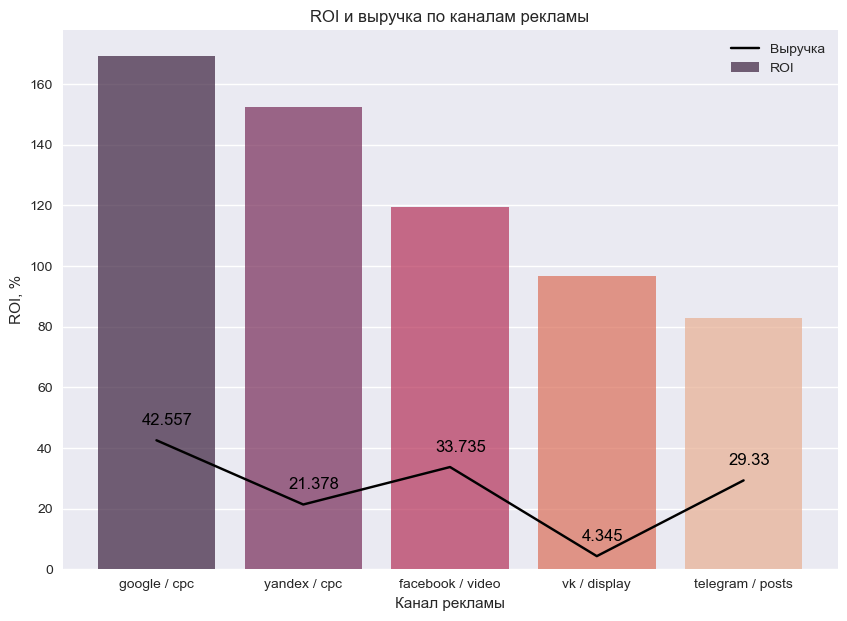

In [159]:
figure, ax = plt.subplots(figsize = (10, 7))
sns.barplot(data = df_add_by_chan
            , x = df_add_by_chan.index
            , y = 'ROI'
            , ax=ax
            , alpha=0.7
            , palette = 'rocket'
            , label = 'ROI')

sns.lineplot(data = df_add_by_chan
            , x =  df_add_by_chan.index
            , y = 'sum_value', ax = ax
            , color = 'black'
            , label = 'Выручка')

revenue = df_add_by_chan['sum_value'].apply(lambda x: round(x, 3))

for index, value in enumerate(revenue):
    ax.annotate(value, xy=(index-0.1, value+5), color='black', size=12) 


ax.set_title('ROI и выручка по каналам рекламы')
ax.set_xlabel('Канал рекламы')
ax.set_ylabel('ROI, %')

- *Какой канал принёс больше всего денег?*

Больше всего дохода принес google / cpc


- *Какой канал самый эффективный?* 

Самый эффективный также google / cpc


- *В пункте 1 и 2 речь об одном и том же канале или о разных? Если разные это разные каналы, укажите, почему так может быть?*

В пункте один и два у нас один канал рекламы. Но могут быть и разные, так как ROI складывается, также из затрат на канал. Если бы выручка меньше или приближена к затратам, то канал был бы менее эффективным, и это было бы видно по ROI


- *Что может произойти, если вложить все деньги в один самый эффективный канал?*

Если мы так сделаем, то канал перестанет быть эффективным, затраты превысят выручку. 
Также если мы вложим все средства в самый эффективный канал, то потеряем выручку и аудиторию с других. А для продукта часто очень важно просто присутствовать в разных каналах, так как это поддерживает медийность. 
